##구글 드라이브 파일 연동

In [1]:
# 구글 드라이브 마운트
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# 나의 루트 경로 설정
rootdir = '/content/drive/MyDrive/Colab Notebooks/통계'

In [7]:
import seaborn as sns

import pandas as pd
import numpy as np
import os

In [8]:
# seaborn의 dataset 목록
print(sns.get_dataset_names())

['anagrams', 'anscombe', 'attention', 'brain_networks', 'car_crashes', 'diamonds', 'dots', 'dowjones', 'exercise', 'flights', 'fmri', 'geyser', 'glue', 'healthexp', 'iris', 'mpg', 'penguins', 'planets', 'seaice', 'taxis', 'tips', 'titanic']


In [56]:
tips = sns.load_dataset('tips')
titanic = sns.load_dataset('titanic')
taxis = sns.load_dataset('taxis')

In [64]:
taxis_csv = pd.read_csv(os.path.join(rootdir, 'data', 'taxis.csv'))

In [11]:
taxis.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6433 entries, 0 to 6432
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   pickup           6433 non-null   datetime64[ns]
 1   dropoff          6433 non-null   datetime64[ns]
 2   passengers       6433 non-null   int64         
 3   distance         6433 non-null   float64       
 4   fare             6433 non-null   float64       
 5   tip              6433 non-null   float64       
 6   tolls            6433 non-null   float64       
 7   total            6433 non-null   float64       
 8   color            6433 non-null   object        
 9   payment          6389 non-null   object        
 10  pickup_zone      6407 non-null   object        
 11  dropoff_zone     6388 non-null   object        
 12  pickup_borough   6407 non-null   object        
 13  dropoff_borough  6388 non-null   object        
dtypes: datetime64[ns](2), float64(5), int64(

In [12]:
taxis_csv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6433 entries, 0 to 6432
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       6433 non-null   int64  
 1   pickup           6433 non-null   object 
 2   dropoff          6433 non-null   object 
 3   passengers       6433 non-null   int64  
 4   distance         6433 non-null   float64
 5   fare             6433 non-null   float64
 6   tip              6433 non-null   float64
 7   tolls            6433 non-null   float64
 8   total            6433 non-null   float64
 9   color            6433 non-null   object 
 10  payment          6389 non-null   object 
 11  pickup_zone      6407 non-null   object 
 12  dropoff_zone     6388 non-null   object 
 13  pickup_borough   6407 non-null   object 
 14  dropoff_borough  6388 non-null   object 
dtypes: float64(5), int64(2), object(8)
memory usage: 754.0+ KB


# 표를 이용한 자료 정리

In [14]:
import seaborn as sns
import pandas as pd

tips = sns.load_dataset('tips')
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


## groupby 사용

In [22]:
# 성별, 흡연여부 별 팁의 평균
tips_grp = tips.groupby(['sex', 'smoker'])[['tip']].mean()
tips_grp

<ipython-input-22-d0ce6f191dac>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  tips_grp = tips.groupby(['sex', 'smoker'])[['tip']].mean()


tip
sex    smoker          
Male   Yes     3.051167
       No      3.113402
Female Yes     2.931515
       No      2.773519

In [24]:
tips_grp.unstack(level=0)   # level=0 : sex
# tips_grp.unstack(level=1)   # level=1 : smoker

tip          
sex         Male    Female
smoker                    
Yes     3.051167  2.931515
No      3.113402  2.773519

In [25]:
tips_grp.index

MultiIndex([(  'Male', 'Yes'),
            (  'Male',  'No'),
            ('Female', 'Yes'),
            ('Female',  'No')],
           names=['sex', 'smoker'])

In [26]:
tips_grp.columns

Index(['tip'], dtype='object')

In [27]:
tips_grp.values

array([[3.05116667],
       [3.11340206],
       [2.93151515],
       [2.77351852]])

## pivot_table 사용

In [36]:
tips.pivot_table(index=['sex', 'smoker'], values=['tip'], aggfunc='mean')

tip
sex    smoker          
Male   Yes     3.051167
       No      3.113402
Female Yes     2.931515
       No      2.773519

In [44]:
tips_pivot = tips.pivot_table(index=['smoker'], columns = ['sex'], values=['tip'], aggfunc=['sum', 'mean'])
tips_pivot

sum              mean          
           tip               tip          
sex       Male  Female      Male    Female
smoker                                    
Yes     183.07   96.74  3.051167  2.931515
No      302.00  149.77  3.113402  2.773519

In [43]:
print(tips_pivot.index)
print(tips_pivot.columns)

CategoricalIndex(['Yes', 'No'], categories=['Yes', 'No'], ordered=False, dtype='category', name='smoker')
MultiIndex([( 'sum', 'tip',   'Male'),
            ( 'sum', 'tip', 'Female'),
            ('mean', 'tip',   'Male'),
            ('mean', 'tip', 'Female')],
           names=[None, None, 'sex'])


In [52]:
tips_pivot2 = tips.pivot_table(index=['smoker', 'time'], columns = ['sex', 'day'], values=['tip'], aggfunc=['sum', 'mean'], fill_value=0, margins=True, margins_name = 'total')
# tips_pivot2.fillna(0, inplace = True)     # 결측치 0으로 넣기
tips_pivot2

sum                                                     \
                 tip                                                      
sex             Male                        Female                        
day             Thur    Fri     Sat     Sun   Thur    Fri    Sat    Sun   
smoker time                                                               
Yes    Lunch   30.58   5.70    0.00    0.00  20.93   7.98   0.00   0.00   
       Dinner   0.00  16.23   77.74   52.82   0.00  10.80  43.03  14.00   
No     Lunch   58.83   0.00    0.00    0.00  58.49   3.00   0.00   0.00   
       Dinner   0.00   5.00  104.21  133.96   3.00   3.25  35.42  46.61   
total          89.41  26.93  181.95  186.78  82.42  25.03  78.45  60.61   

                           mean                                       \
                            tip                                        
sex             total      Male                               Female   
day                        Thur    Fri       Sat       Sun      Thur   
smoker time                                                            
Yes    Lunch    65.19  3.058000  1.900  0.000000  0.000000  2.990000   
       Dinner  214.62  0.000000  3.246  2.879259  3.521333  0.000000   
No     Lunch   120.32  2.941500  0.000  0.000000  0.000000  2.437083   
       Dinner  331.45  0.000000  2.500  3.256563  3.115349  3.000000   
total          731.58  2.980333  2.693  3.083898  3.220345  2.575625   

                                                       
                                                       
sex                                             total  
day                 Fri       Sat       Sun            
smoker time                                            
Yes    Lunch   2.660000  0.000000  0.000000  2.834348  
       Dinner  2.700000  2.868667  3.500000  3.066000  
No     Lunch   3.000000  0.000000  0.000000  2.673778  
       Dinner  3.250000  2.724615  3.329286  3.126887  
total          2.781111  2.801786  3.367222  2.998279

In [49]:
import pandas as pd
pd.pivot_table?

---
## groupby, pivot_table - indexing 방법확인

In [69]:
taxis.head()

,pickup,dropoff,passengers,distance,fare,tip,tolls,total,color,payment,pickup_zone,dropoff_zone,pickup_borough,dropoff_borough
0,2019-03-23 20:21:09,2019-03-23 20:27:24,1,1.60,7.0,2.15,0.0,12.95,yellow,credit card,Lenox Hill West,UN/Turtle Bay South,Manhattan,Manhattan
1,2019-03-04 16:11:55,2019-03-04 16:19:00,1,0.79,5.0,0.00,0.0,9.30,yellow,cash,Upper West Side South,Upper West Side South,Manhattan,Manhattan
2,2019-03-27 17:53:01,2019-03-27 18:00:25,1,1.37,7.5,2.36,0.0,14.16,yellow,credit card,Alphabet City,West Village,Manhattan,Manhattan
3,2019-03-10 01:23:59,2019-03-10 01:49:51,1,7.70,27.0,6.15,0.0,36.95,yellow,credit card,Hudson Sq,Yorkville West,Manhattan,Manhattan
4,2019-03-30 13:27:42,2019-03-30 13:37:14,3,2.16,9.0,1.10,0.0,13.40,yellow,credit card,Midtown East,Yorkville West,Manhattan,Manhattan


In [58]:
taxis['tip'].head()

0    2.15
1    0.00
2    2.36
3    6.15
4    1.10
Name: tip, dtype: float64

In [68]:
taxis_csv['tip'].sort_values(ascending=True).head()

1986    0.0
5385    0.0
5384    0.0
2124    0.0
2125    0.0
Name: tip, dtype: float64

In [91]:
taxis_csv['tip_rank'] = taxis_csv['tip'].rank(method='first')

- pandas.cut을 사용 하면 값 자체에 따라 균등하게 간격을 둔 빈이 선택되고
- pandas.qcut은 각 빈에 동일한 수의 레코드가 있도록 빈이 선택됩니다.

In [109]:
pd.cut(taxis_csv['tip'], bins=10, labels=['T1','T2','T3','T4','T5','T6','T7','T8','T9','T10']).value_counts()

tip
T1     5315
T2      826
T3      158
T4      107
T5       18
T7        5
T6        3
T10       1
T8        0
T9        0
Name: count, dtype: int64

In [114]:
pd.qcut(taxis_csv['tip_rank'].values, q=10, labels=['T1','T2','T3','T4','T5','T6','T7','T8','T9','T10'])

['T7', 'T1', 'T7', 'T10', 'T5', ..., 'T5', 'T4', 'T4', 'T4', 'T9']
Length: 6433
Categories (10, object): ['T1' < 'T2' < 'T3' < 'T4' ... 'T7' < 'T8' < 'T9' < 'T10']

In [119]:
print('전체개수 : ', taxis_csv['tip'].count())
print('0의 개수 : ', taxis_csv['tip'][taxis_csv['tip'] == 0].count())

전체개수 :  6433
0의 개수 :  2311


In [112]:
pd.qcut(taxis_csv['tip'][taxis_csv['tip']!=0], q=10, labels=['T1','T2','T3','T4','T5','T6','T7','T8','T9', 'T10'])

0        T5
2        T5
3       T10
4        T2
5        T5
       ... 
6414     T7
6418     T3
6426     T1
6428     T1
6432     T8
Name: tip, Length: 4122, dtype: category
Categories (10, object): ['T1' < 'T2' < 'T3' < 'T4' ... 'T7' < 'T8' < 'T9' < 'T10']

### 그래프 실습

#### 밀도분포

In [121]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


<Axes: ylabel='Frequency'>

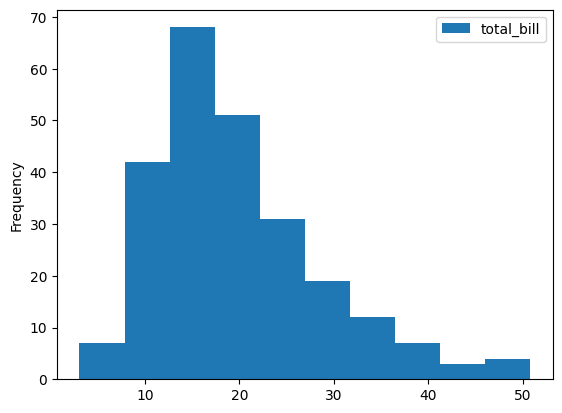

In [123]:
tips[['total_bill']].plot(kind = 'hist')

<Axes: xlabel='total_bill', ylabel='density'>

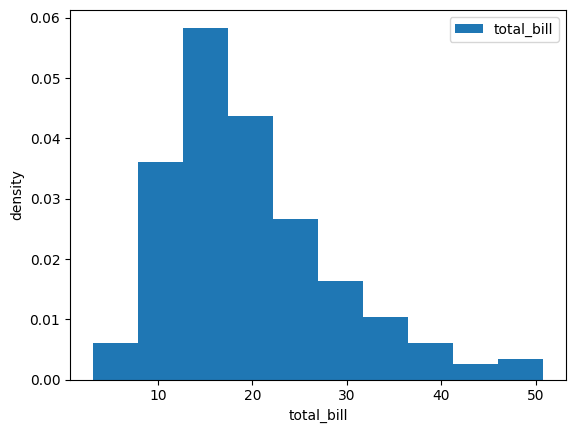

In [128]:
tips[['total_bill']].plot(kind = 'hist', density=True, xlabel='total_bill', ylabel='density')

<Axes: xlabel='total_bill', ylabel='density'>

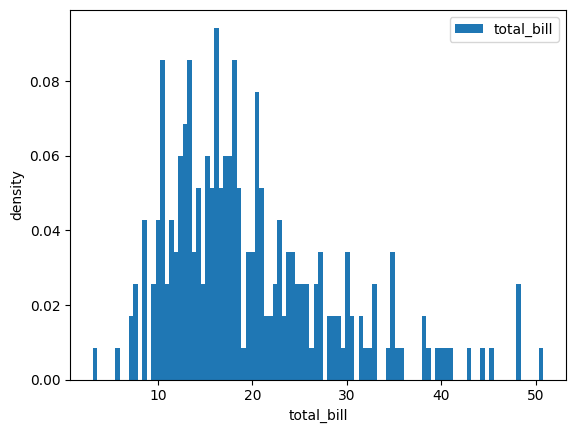

In [129]:
tips[['total_bill']].plot(kind = 'hist', bins = 100, density=True, xlabel='total_bill', ylabel='density')

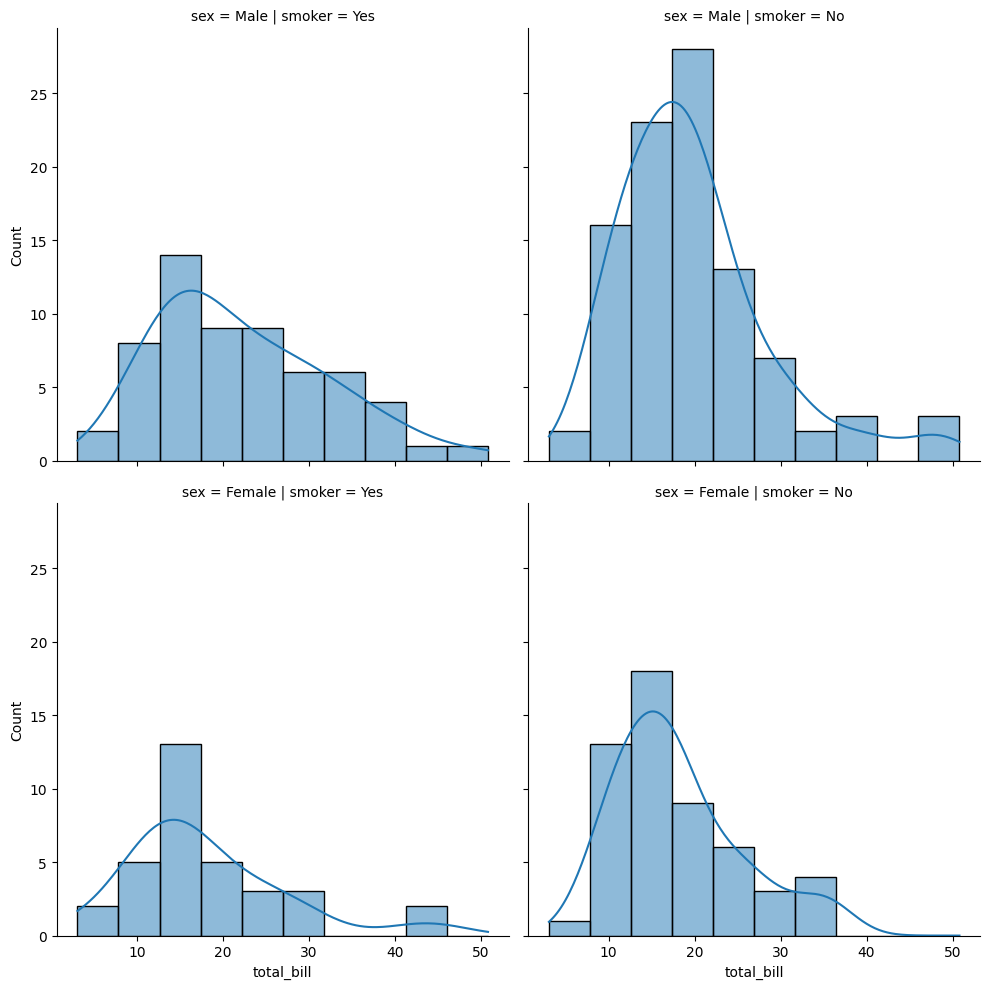

In [138]:
sns.displot(tips, x = 'total_bill', col = 'smoker', row = 'sex', kde='True', bins = 10)